# **Lab Session 07 Assignment**

In [ ]:
##############################################################
##################  DO NOT CHANGE THIS CODE ##################
##############################################################

# Import required packages
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(0)

# Load FASHOIN_MNIST (refer LAB 06 material)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

##############################################################
##################  DO NOT CHANGE THIS CODE ##################
##############################################################

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1719/1719 [==============================] - 17s 9ms/step - loss: 0.7266 - accuracy: 0.7604 - val_loss: 0.4975 - val_accuracy: 0.8310
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4879 - accuracy: 0.8296 - val_loss: 0.4997 - val_accuracy: 0.8242
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4425 - accuracy: 0.8451 - val_loss: 0.4224 - val_accuracy: 0.8598
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4154 - accuracy: 0.8553 - val_loss: 0.4190 - val_accuracy: 0.8574
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8608 - val_loss: 0.3756 - val_accuracy: 0.8716


## **Problem 1-1**

Add BatchNormalization layers to following **BN_model**.

We will only evaluate whether **BN_model** includes BatchNormalization layers and the training code runs withou error.

In [ ]:
##################################################
##################  Problem 1-1 ##################
##################################################

# Add BatchNormalization layers to following 'BN_model'

BN_model = keras.models.Sequential()
BN_model.add(keras.layers.Flatten(input_shape=[28, 28]))
BN_model.add(keras.layers.Dense(300, activation='relu'))
BN_model.add(keras.layers.BatchNormalization())
BN_model.add(keras.layers.Dense(100, activation='relu'))
BN_model.add(keras.layers.BatchNormalization())
BN_model.add(keras.layers.Dense(10, activation='softmax'))
BN_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
BN_history = BN_model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5256 - accuracy: 0.8176 - val_loss: 0.3781 - val_accuracy: 0.8660
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3972 - accuracy: 0.8579 - val_loss: 0.3817 - val_accuracy: 0.8578
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3609 - accuracy: 0.8713 - val_loss: 0.3437 - val_accuracy: 0.8768
Epoch 4/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3363 - accuracy: 0.8773 - val_loss: 0.3463 - val_accuracy: 0.8720
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3149 - accuracy: 0.8852 - val_loss: 0.3239 - val_accuracy: 0.8832


## **Problem 1-2**

Compare the losses of the models with/without BatchNormalization layers.
Why BatchNormalization is good?

BatchNormalization acts by adjusting the input of each layer, aligning activations to a suitable range and enhancing the effectiveness of training. The incorporation of BatchNormalization not only expedites training but also fosters stability, culminating in a decrease in training loss.

## **Problem 2**

Visualize **BN_model** with the function **keras.utils.plot_model**


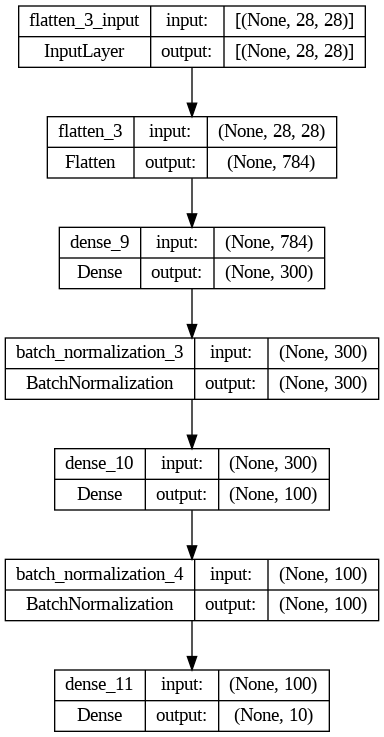

In [ ]:
keras.utils.plot_model(BN_model, "Functional.png", show_shapes=True, show_layer_names=True) # Fill the arguments of the function

## **Problem 3**

Load the saved model.

If properly loaded, the code will successfully run

In [ ]:
##############################################################
##################  DO NOT CHANGE THIS CODE ##################
##############################################################

saved_model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]), keras.layers.Dense(300, activation='relu'), keras.layers.Dense(100, activation='relu'), keras.layers.Dense(10, activation='softmax')])
saved_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
saved_model.save('my_keras_model.h5')
del saved_model

##############################################################
##################  DO NOT CHANGE THIS CODE ##################
##############################################################

In [ ]:
##################################################
###################  Problem 3 ###################
##################################################

loaded_model = keras.models.load_model("my_keras_model.h5")



In [ ]:
##############################################################
##################  DO NOT CHANGE THIS CODE ##################
##############################################################

loaded_model_history = loaded_model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))

##############################################################
##################  DO NOT CHANGE THIS CODE ##################
##############################################################

1719/1719 [==============================] - 8s 4ms/step - loss: 0.7262 - accuracy: 0.1067 - val_loss: 0.5051 - val_accuracy: 0.0812
